This code imports all necessary Python libraries and loads the simulated patient wellness Data set.  The head() function shows the first five records to confirm the data loaded correctly.

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_csv('simulated_health_wellness_data.csv')


In [6]:
print(df.head()) 

   Exercise_Time_Min  Healthy_Meals_Per_Day  Sleep_Hours_Per_Night  \
0          34.967142                      5               7.618856   
1          28.617357                      8               4.105473   
2          36.476885                      4               6.024123   
3          45.230299                      1               8.565319   
4          27.658466                      3               8.301648   

   Stress_Level        BMI  
0             2  33.068556  
1             7  27.267672  
2             1  23.779217  
3             8  29.820436  
4             3  30.947352  


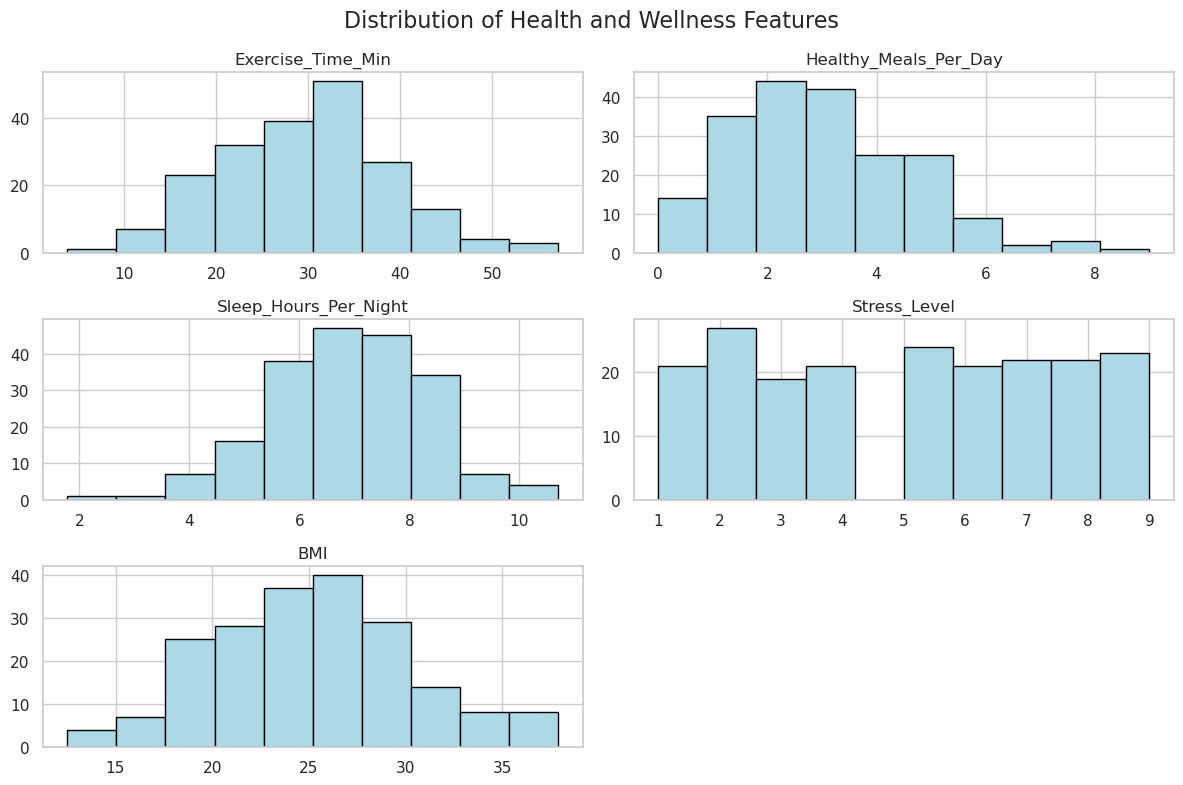

In [8]:
# Plotting the distribution of all numeric columns
sns.set(style='whitegrid')
df.hist(figsize=(12, 8), color='lightblue', edgecolor='black')
plt.suptitle('Distribution of Health and Wellness Features', fontsize=16)
plt.tight_layout()
plt.show() 

Box plots are used to detect outliers and understand the spread of each variable in the Data 

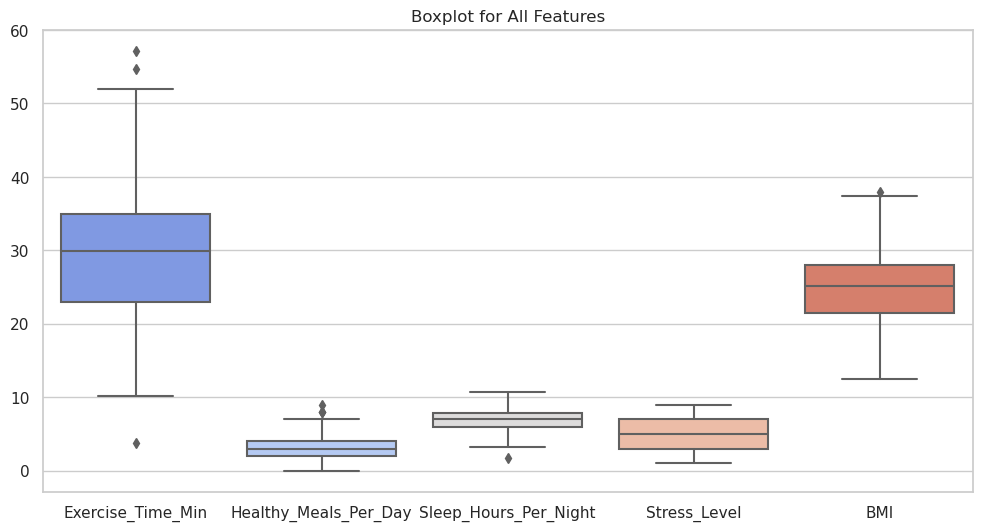

In [9]:

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, palette="coolwarm")
plt.title("Boxplot for All Features")
plt.show() 

This code shows the correlation between all features. It helps us identify which variables are positively or negatively related.

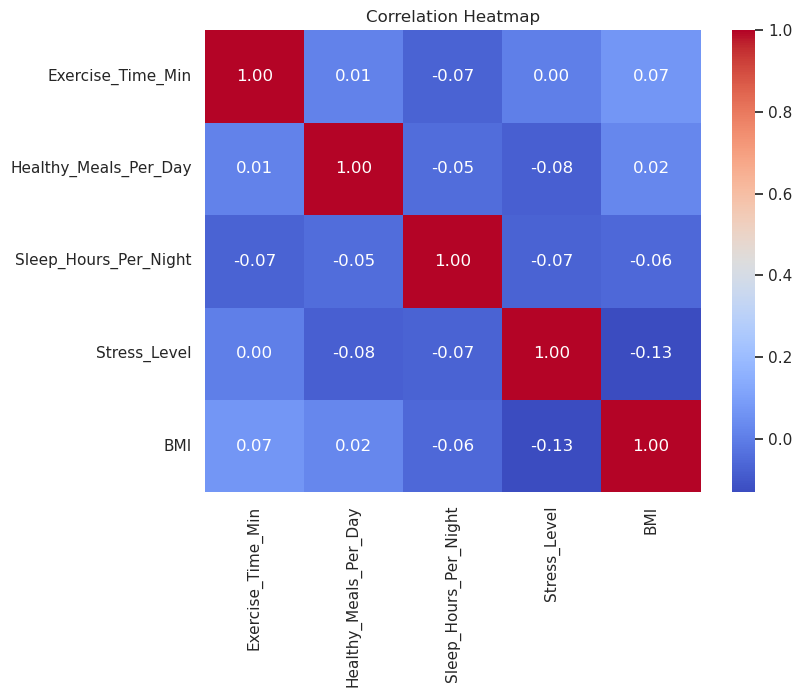

In [10]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show() 

A pair plot provides scatter plots for every pair of features to help identify patterns or natural clusters visually. The warning is suppressed to keep output clean.



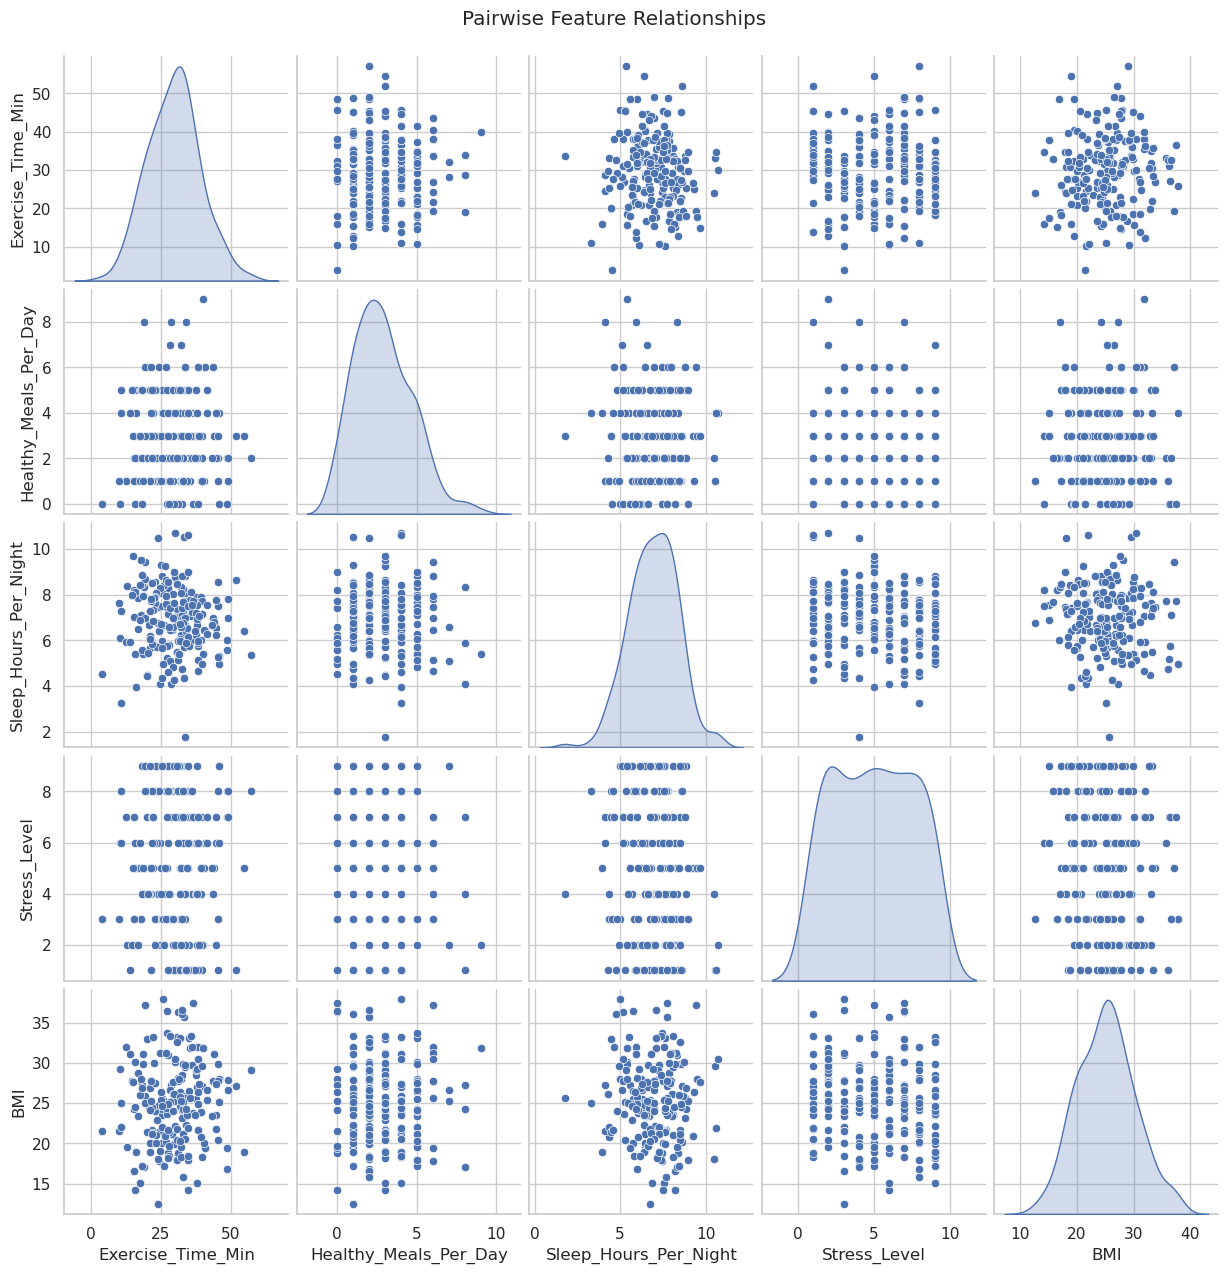

In [11]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

# Plotting pairwise relationships
sns.pairplot(df, diag_kind='kde')
plt.suptitle("Pairwise Feature Relationships", y=1.02)
plt.show() 

This visual compares stress level and sleep duration, with the number of healthy meals shown by color to observe multidimensional relationships.


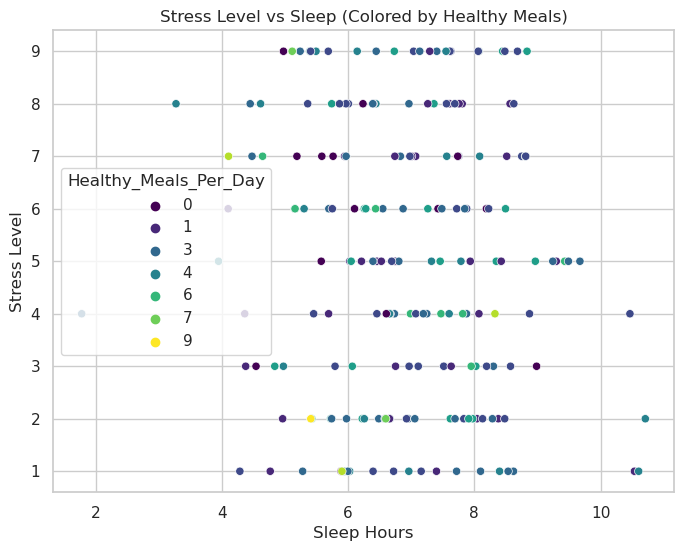

In [12]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Sleep_Hours_Per_Night', y='Stress_Level', data=df, hue='Healthy_Meals_Per_Day', palette='viridis')
plt.title("Stress Level vs Sleep (Colored by Healthy Meals)")
plt.xlabel("Sleep Hours")
plt.ylabel("Stress Level")
plt.show() 

This code standardizes all features using z-scores to ensure each variable contributes equally to clustering models.


In [13]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df) 

This block helps determine the optimal number of clusters using the Elbow Method and Silhouette Score. It plots W-CSS  (inertia) and Silhouette for clusters from 2 to 10.



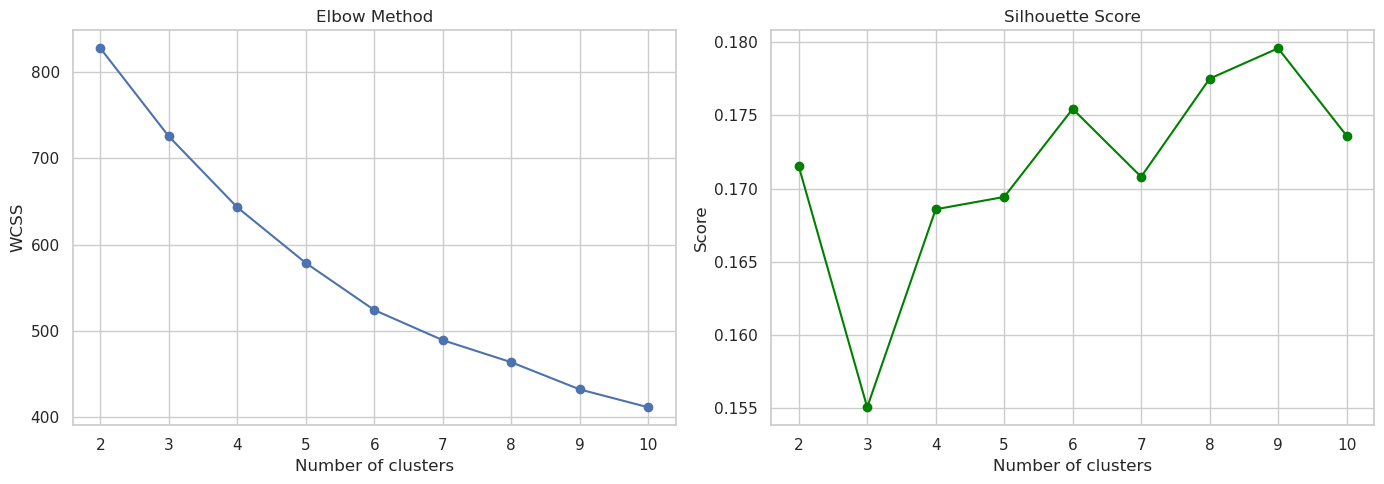

In [15]:
wcss = []
silhouettes = []
K_range = range(2, 11)

for k in K_range:
    model = KMeans(n_clusters=k, n_init=10, random_state=42)  
    model.fit(scaled_df)
    wcss.append(model.inertia_)
    silhouettes.append(silhouette_score(scaled_df, model.labels_))

# Plotting Elbow and Silhouette Score
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(K_range, wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

plt.subplot(1, 2, 2)
plt.plot(K_range, silhouettes, marker='o', color='green')
plt.title('Silhouette Score')
plt.xlabel('Number of clusters')
plt.ylabel('Score')

plt.tight_layout()
plt.show()

Once the optimal cluster number is chosen (let's assume it's 4), this applies K-Means and stores the cluster label in the data set.



In [17]:
kmeans = KMeans(n_clusters=4, n_init=10, random_state=42)
df['KMeans_Cluster'] = kmeans.fit_predict(scaled_df) 

This generates a visuals  showing how samples are merged in hierarchical clustering. It helps visually determine the number of natural clusters.


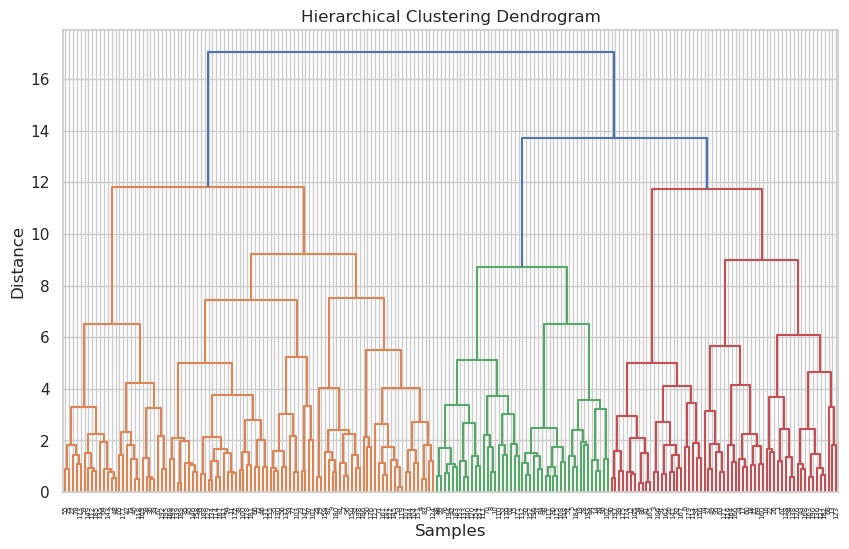

In [18]:
plt.figure(figsize=(10, 6))
linked = linkage(scaled_df, 'ward')
dendrogram(linked)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.show() 

Applies a Clustering model and saves the resulting cluster labels.

In [19]:
agg = AgglomerativeClustering(n_clusters=4)
df['Hierarchical_Cluster'] = agg.fit_predict(scaled_df) 

This reduces the data set to two principal components for visualization. It then plots K-Means clusters in the new 2 D      P-CA space.



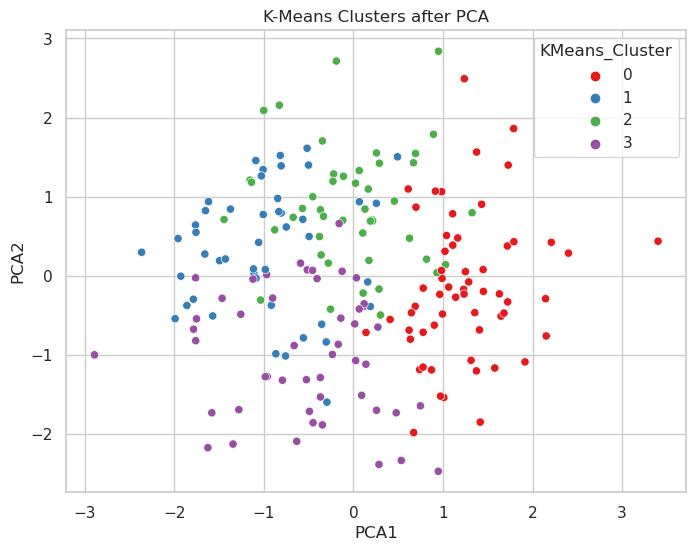

In [20]:
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_df)
df['PCA1'] = pca_components[:, 0]
df['PCA2'] = pca_components[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='KMeans_Cluster', data=df, palette='Set1')
plt.title("K-Means Clusters after PCA")
plt.show() 

K-Means Silhouette Score (Pre-PCA): 0.16858555085962337
Hierarchical Silhouette Score (Pre-PCA): 0.11439220678283027
K-Means (Post-PCA): 0.15112970910681264
Hierarchical (Post-PCA): 0.09205367418654088
